In [18]:
import pandas as pd
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import os
import torch
import torchvision
from torch import nn
from d2l import torch as d2l
import shutil
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from torchvision.utils import save_image
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import random

In [2]:
'''This function downloads the images from the excel in a folder -- use only fist time'''
#GPT function haha...
def download_images_from_excel(excel_file, sheet_name,image_column, brand_column, output_folder):
    # Read Excel file
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Iterate through rows and download images
    for index, row in df.iterrows():
        image_url = row[image_column]
        brand_name = row[brand_column]
        try:
            response = requests.get(image_url)
            if response.status_code == 200:
                # Open image from the response
                image = Image.open(BytesIO(response.content))
                # Convert image to JPEG format
                if image.format != 'JPEG':
                    image = image.convert('RGB')
                # Save image to the output folder with brand name as filename
                image_path = os.path.join(output_folder, f"{brand_name}.jpg")
                image.save(image_path, "JPEG")
                print(f"Image for {brand_name} downloaded successfully.")
            else:
                print(f"Failed to download image for {brand_name}. Status code: {response.status_code}")
        except Exception as e:
            print(f"Failed to download image for {brand_name}. Error: {e}")
if __name__ == "__main__":
    # Replace 'example.xlsx' with your Excel file name
    excel_file = 'merged_data.xlsx'
    # Replace 'Sheet1' with the name of the specific sheet you want to read from
    sheet_name = 'Sheet1'
    # Replace 'Image URL' with the name of the column containing image URLs
    image_column = 'exampleUrl'
    # Replace 'brands' with the name of the column containing brand names
    brand_column = 'name'
    # Replace 'output_folder' with the path of the folder where you want to save images
    output_folder = r"C:\Users\EmiliaGachowetz-Gepp\Documents\Image Augmentation\Images"
    download_images_from_excel(excel_file, sheet_name, image_column, brand_column, output_folder)

Image for 4AP Geoteknik downloaded successfully.
Image for Aktiv Revision downloaded successfully.


C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Image for Alm. Brand downloaded successfully.
Image for Alt på det rene downloaded successfully.
Image for Arkitektfirmaet Rudolf LOLK downloaded successfully.
Image for Associated Danish Ports downloaded successfully.
Image for ATN Service ApS downloaded successfully.
Image for Bambuni downloaded successfully.
Image for Betway downloaded successfully.
Image for Binding downloaded successfully.
Image for BMW Danmark downloaded successfully.
Failed to download image for BO1. Error: Invalid URL 'bo1.de/wp-content/uploads/2023/10/BO1-TypoLogo-Black-min.svg': No scheme supplied. Perhaps you meant https://bo1.de/wp-content/uploads/2023/10/BO1-TypoLogo-Black-min.svg?
Image for BOB downloaded successfully.
Image for Broager Sparekasse downloaded successfully.
Image for Broager Sparekasse downloaded successfully.


KeyboardInterrupt: 

In [54]:
'''This function will read the images in the specified directory into a df'''

image_directory = r'C:\Users\EmiliaGachowetz-Gepp\Documents\Image Augmentation\Images'

#convert to a list of all files in the directory
image_filenames = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]


def process_images(image_directory, image_filenames):
    image_data = []  #list to store image data

    for filename in image_filenames:
        try:
            image_path = os.path.join(image_directory, filename)  # Construct the full path to the image file
            img = Image.open(image_path)  # Open the image using Pillow (PIL)
            img = img.convert('RGB') #converting to RGB --> but then the transforms is not working
            #img = img.convert('L') #Converting to gray scale
            #img_resized = img.resize((150, 150), Image.LANCZOS) #NOT bc some have weird format
            #img_array = np.array(img_resized) # Convert image to numpy array if needed
            image_data.append({'Filename': filename, 'Image': img})

        except Exception as e:
            # Handle errors (e.g., if the image cannot be processed)
            print(f"Error processing image {filename}: {e}")

    image_df = pd.DataFrame(image_data)
    return image_df

image_df=process_images(image_directory, image_filenames)

C:\Users\EmiliaGachowetz-Gepp\anaconda3\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [55]:
image_df

,Filename,Image
0,4AP Geoteknik.jpg,<PIL.Image.Image image mode=RGB size=329x154 a...
1,Aktiv Revision.jpg,<PIL.Image.Image image mode=RGB size=539x116 a...
2,Alm. Brand.jpg,<PIL.Image.Image image mode=RGB size=834x543 a...
3,Alt på det Rene.png,<PIL.Image.Image image mode=RGB size=372x91 at...
4,Arkitektfirmaet Rudolf LOLK.jpg,<PIL.Image.Image image mode=RGB size=200x200 a...
...,...,...
120,VGF.jpg,<PIL.Image.Image image mode=RGB size=340x227 a...
121,Vitamin Well.jpg,<PIL.Image.Image image mode=RGB size=4300x1721...
122,Xpeng.jpg,<PIL.Image.Image image mode=RGB size=1024x575 ...
123,Østermark Entreprenørforretning.jpg,<PIL.Image.Image image mode=RGB size=204x91 at...


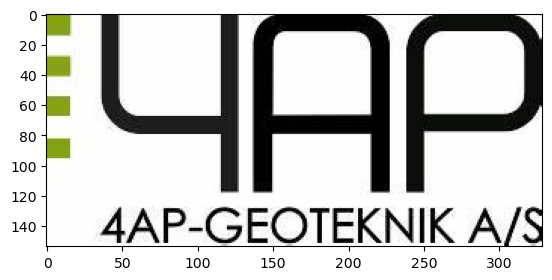

In [72]:
#plot one image
img = image_df["Image"].iloc[0]
plt.imshow(img)
plt.show()

Note: When an image is transformed into a PyTorch tensor, the pixel values are scaled between 0.0 and 1.0. In PyTorch, this transformation can be done using torchvision.transforms.ToTensor(). It converts the PIL image with a pixel range of [0, 255] to a PyTorch FloatTensor of shape (C, H, W) with a range [0.0, 1.0]. 
Approach:
Load and visualize image and plot pixel values.
Transform image to Tensors using torchvision.transforms.ToTensor()
Calculate mean and standard deviation (std)
Normalize the image using torchvision.transforms.Normalize().
Visualize normalized image.
Calculate mean and std after normalize and verify them.

Text(0.5, 1.0, 'distribution of pixels')

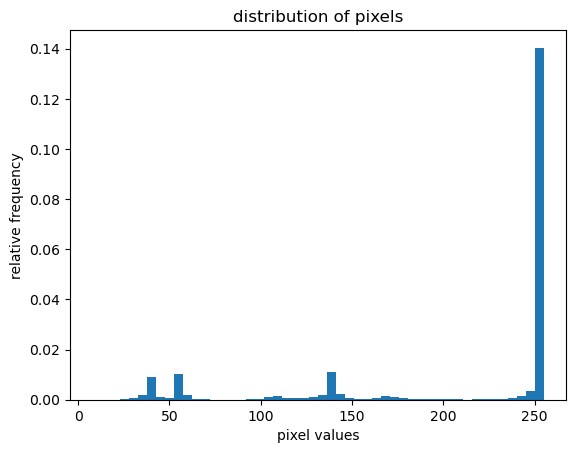

In [23]:
#plot the pixel values of an image
#for that first convert PIL image to numpy array
img_np = np.array(img)

plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")
#--> when converted to a tensor, dstrbution is the same but values range between 0-1

In [39]:
'''We need to define a transformation that normalizes the images'''
#Use only if you want o nomrlaize --> distorts images a lot I feel, but apparently needed... no idea

def normalize(df):
    images = []
    filenames = []
    
    transform_1=v2.Compose([
    v2.ToTensor()])

    for index, row in df.iterrows():
        img = row['Image']
        filename = row['Filename']

        img = transform_1(img)
        mean, std = img.mean([1, 2]), img.std([1, 2])
        transform_2 = v2.Compose([
            v2.Normalize(mean, std)
        ])
        img = transform_2(img)
            
        images.append(img)
        filenames.append(filename)

    augmented_df = pd.DataFrame({
        'Image': images,
        'Filename': filenames
    })

    return augmented_df
    
image_df=normalize(image_df)
image_df

,Image,Filename
0,"[[[tensor(-0.5186), tensor(-0.5186), tensor(-0...",4AP Geoteknik.jpg
1,"[[[tensor(0.4910), tensor(0.4910), tensor(0.49...",Aktiv Revision.jpg
2,"[[[tensor(-0.3549), tensor(-0.3549), tensor(-0...",Alm. Brand.jpg
3,"[[[tensor(0.3628), tensor(0.3628), tensor(0.36...",Alt på det Rene.png
4,"[[[tensor(0.6314), tensor(0.6314), tensor(0.63...",Arkitektfirmaet Rudolf LOLK.jpg
...,...,...
120,"[[[tensor(-0.2758), tensor(-0.2758), tensor(-0...",VGF.jpg
121,"[[[tensor(-0.8770), tensor(1.2908), tensor(1.0...",Vitamin Well.jpg
122,"[[[tensor(0.2204), tensor(0.2204), tensor(0.22...",Xpeng.jpg
123,"[[[tensor(-0.5699), tensor(-0.5699), tensor(-0...",Østermark Entreprenørforretning.jpg


In [57]:
#First transformations
# TO DO: NORMALIZE --> above DONE
transforms = v2.Compose([
    v2.PILToTensor(), #Convert to tensor,needed if we had PIL images, but not necessary if we apply normalize-function
    v2.ToDtype(torch.uint8, scale=True),  #optional, in case input is not uint8
    v2.GaussianBlur(kernel_size=(7, 7), sigma=(0.1, 5)), #this blurrs some of them a lot already
    v2.RandomAdjustSharpness(sharpness_factor=4),
    v2.ToDtype(torch.float32, scale=True),
])

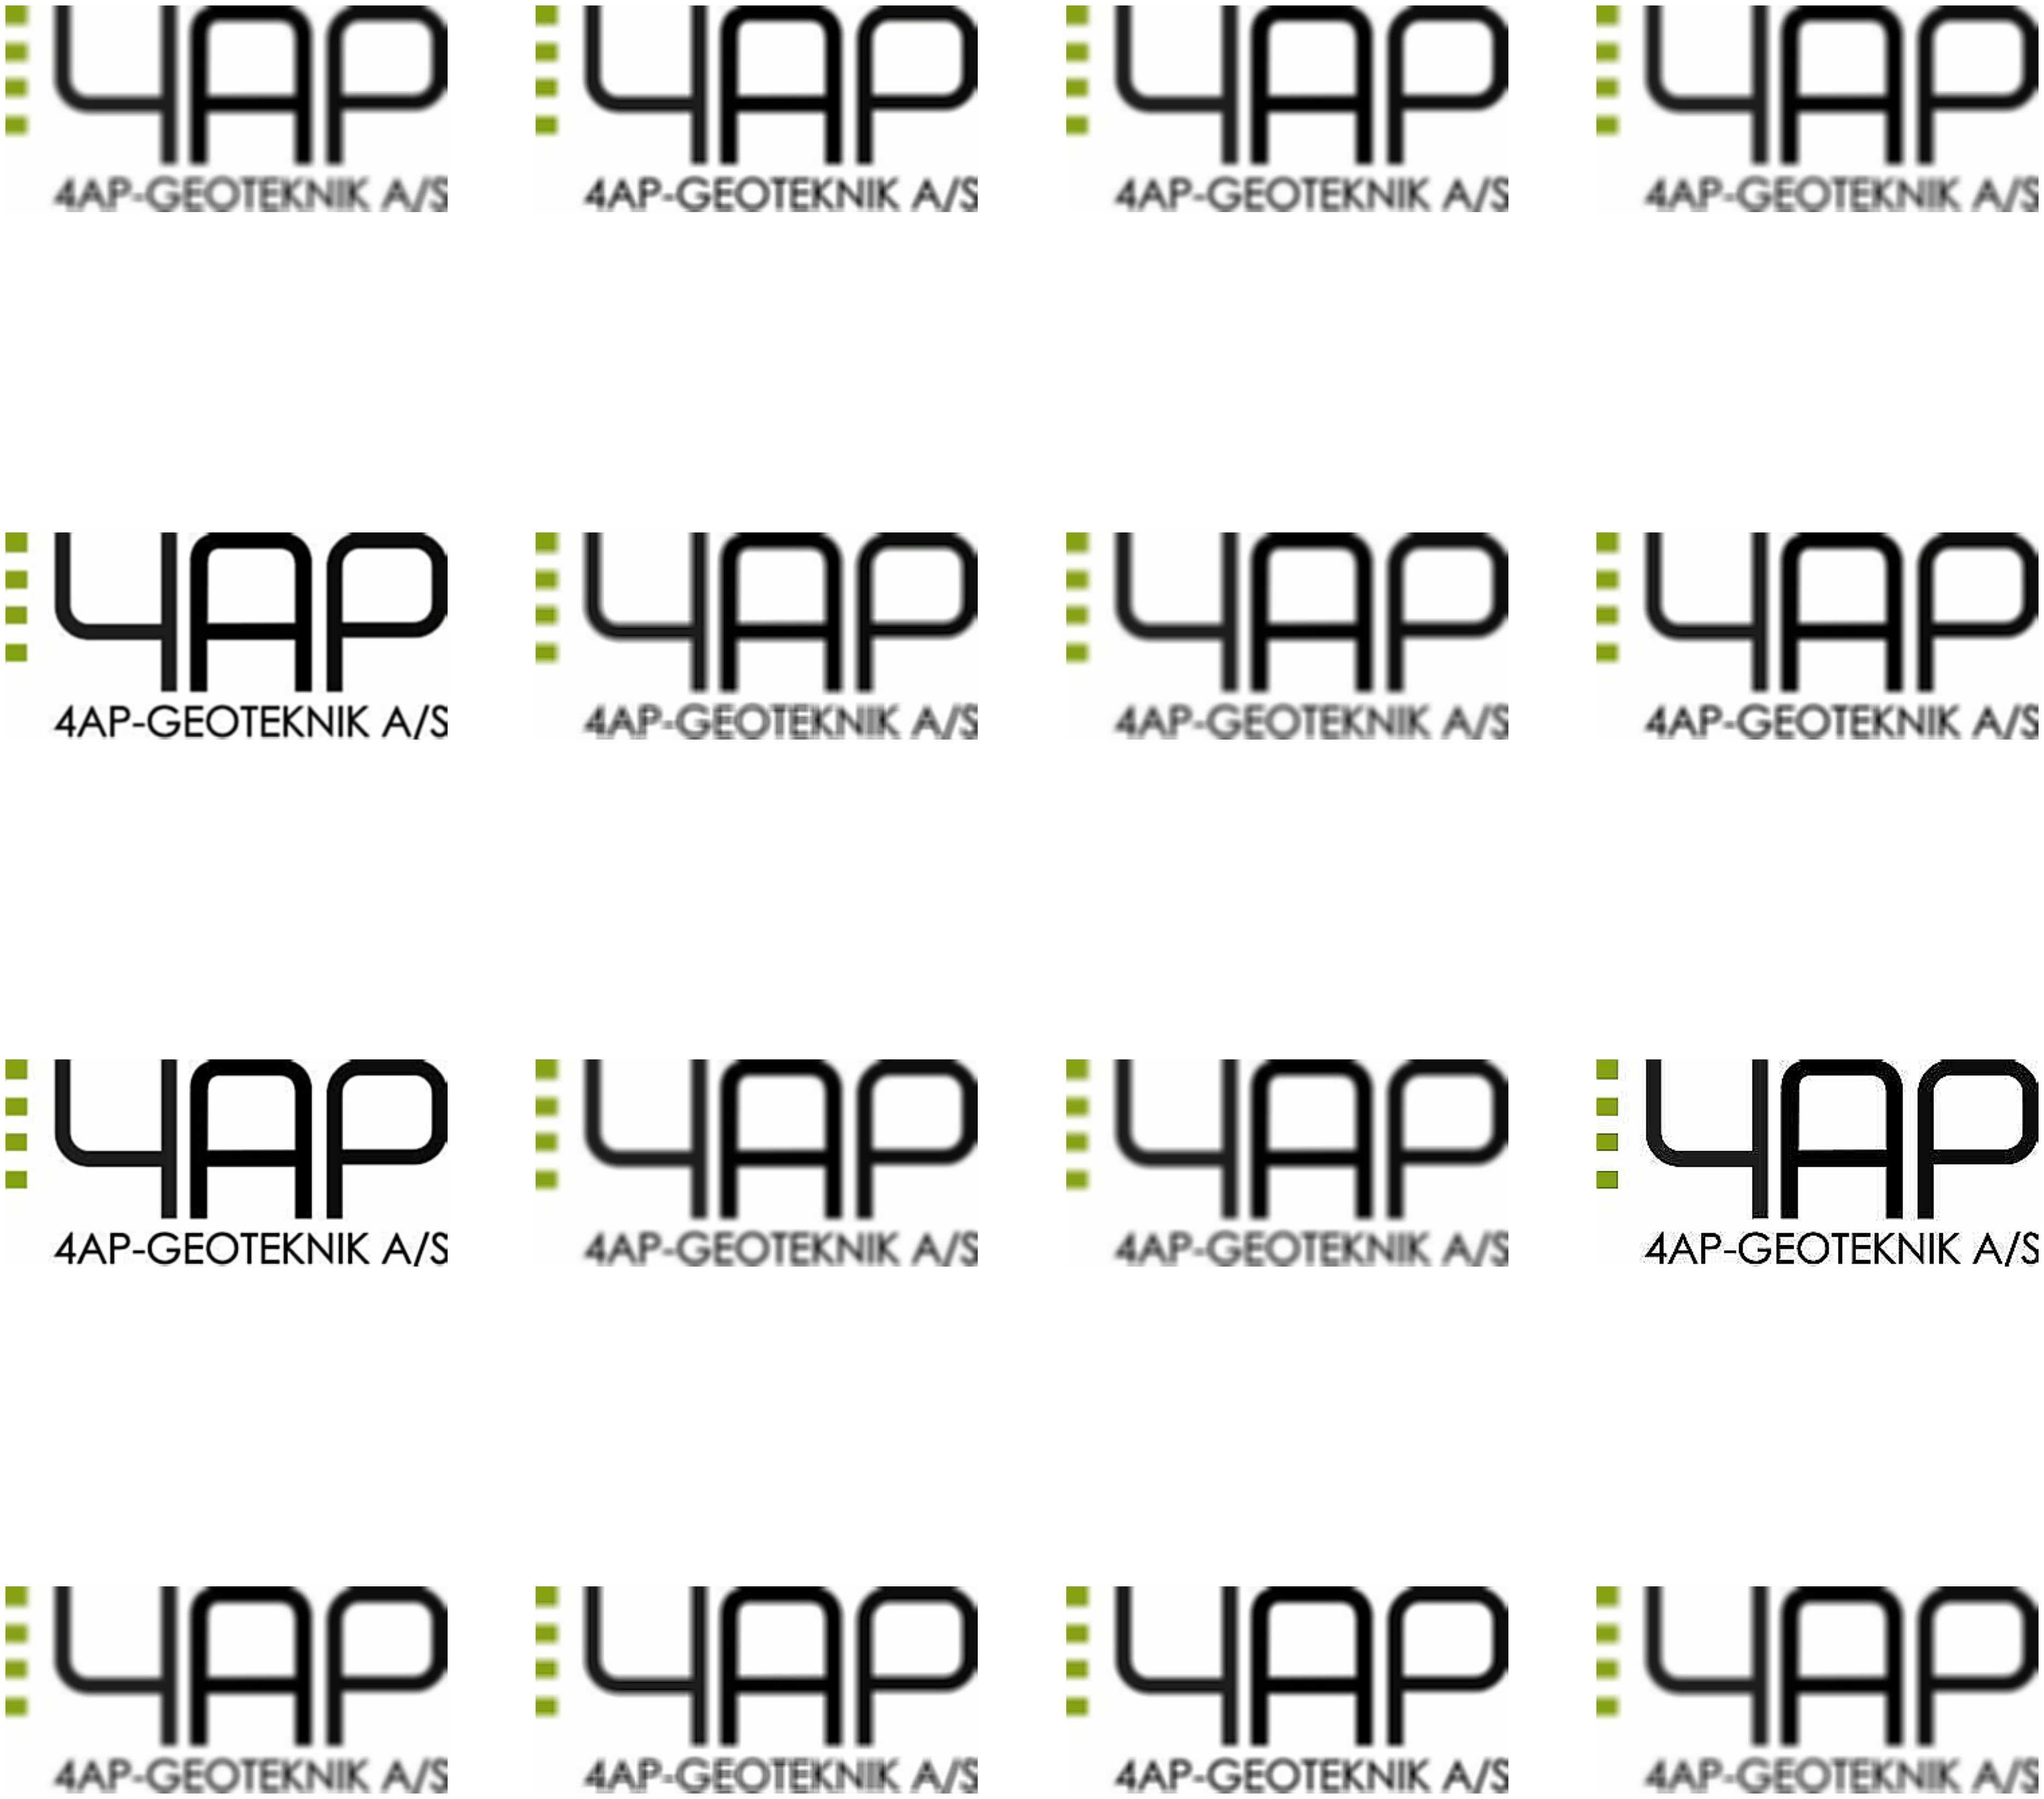

[tensor([[[0.5255, 0.5255, 0.5255,  ..., 0.9843, 0.9843, 0.9843],
          [0.5255, 0.5255, 0.5255,  ..., 0.9843, 0.9843, 0.9843],
          [0.5255, 0.5255, 0.5255,  ..., 0.9843, 0.9843, 0.9843],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.5608, 0.5647, 0.5647],
          [0.9961, 0.9961, 0.9961,  ..., 0.6000, 0.6353, 0.6431],
          [0.9961, 0.9961, 0.9961,  ..., 0.6157, 0.6588, 0.6706]],
 
         [[0.6314, 0.6314, 0.6353,  ..., 0.9843, 0.9843, 0.9843],
          [0.6353, 0.6353, 0.6353,  ..., 0.9843, 0.9843, 0.9843],
          [0.6353, 0.6353, 0.6392,  ..., 0.9843, 0.9843, 0.9843],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.5608, 0.5647, 0.5647],
          [0.9961, 0.9961, 0.9961,  ..., 0.6000, 0.6353, 0.6431],
          [0.9961, 0.9961, 0.9961,  ..., 0.6157, 0.6588, 0.6706]],
 
         [[0.1137, 0.1098, 0.1098,  ..., 0.9843, 0.9843, 0.9843],
          [0.1059, 0.1059, 0.1020,  ..., 0.9843, 0.9843, 0.9843],
          [0.0902, 0.0902, 0.0902,  ...,

In [73]:
'''This function will apply and plot the transformations above for one selcted image'''

def apply(img, aug, num_rows=4, num_cols=4, scale=12):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    
    #numpy arrays and denormalization --> use this line if you have not normliazed the images, else don't
    Y_np = [(x.numpy().transpose(1, 2, 0)).clip(0, 1) for x in Y]
    
    #This plots the images
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols*scale, num_rows*scale))
    for i in range(num_rows):
        for j in range(num_cols):
            axs[i, j].imshow(Y_np[i*num_cols+j]) #chnage Y_np to Y in case norm. function is applied
            axs[i, j].axis('off')
    plt.show()
    
    return Y
#be careful to use np of img (not img itself) if normalized function is applied
apply(img, transforms)


In [60]:
'''This function will apply and then save to tensors with filenames in a df'''

def apply_and_save(df, aug, scale=1.5):
    augmented_images = []
    filenames = []

    for index, row in df.iterrows():
        img = row['Image']
        filename = row['Filename']

        for i in range(2): #adapt to how many times the image should be augmented (now 2x)
            augmented_img = aug(img)
            augmented_images.append(augmented_img)
            filenames.append(filename)

    augmented_df = pd.DataFrame({
        'augmented_images': augmented_images,
        'filename': filenames
    })

    return augmented_df

test_df=image_df.iloc[0:4,]
augmented=apply_and_save(test_df, transforms)
augmented

,augmented_images,filename
0,"[[[tensor(0.5255), tensor(0.5255), tensor(0.52...",4AP Geoteknik.jpg
1,"[[[tensor(0.5255), tensor(0.5255), tensor(0.52...",4AP Geoteknik.jpg
2,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",Aktiv Revision.jpg
3,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",Aktiv Revision.jpg
4,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Alm. Brand.jpg
5,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Alm. Brand.jpg
6,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",Alt på det Rene.png
7,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...",Alt på det Rene.png


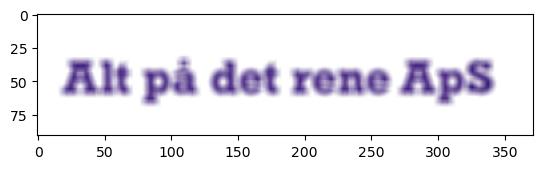

In [61]:
#plot one image
img2 = augmented["augmented_images"].iloc[7]
plt.imshow(img2.permute(1, 2, 0))

In [62]:
'''This function augments the data again by rotating it'''

def rotate_images(df, img_column, filename_column):
    augmented_images = []
    filenames = []
    for index, row in df.iterrows():
        img = row[img_column]
        filename = row[filename_column]
        
        for i in range(2):
            alpha_channel = torch.full((1, img.shape[1], img.shape[2]), 255, dtype=torch.uint8)
            img_tensor_rgba = torch.cat((img, alpha_channel), dim=0)
            angle = random.uniform(0, 180)  #random angle between 0-180 degrees
            rotated_img = TF.rotate(img_tensor_rgba, angle, fill=(0, 0, 0, 0), expand=True)
            augmented_images.append(rotated_img)
            filenames.append(filename)
            
        augmented_df = pd.DataFrame({
        'augmented_images': augmented_images,
        'filename': filenames
        })
    return augmented_df

augmented_2=rotate_images(augmented,'augmented_images','filename')
augmented_2

,augmented_images,filename
0,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",4AP Geoteknik.jpg
1,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",4AP Geoteknik.jpg
2,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",4AP Geoteknik.jpg
3,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",4AP Geoteknik.jpg
4,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Aktiv Revision.jpg
5,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Aktiv Revision.jpg
6,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Aktiv Revision.jpg
7,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Aktiv Revision.jpg
8,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Alm. Brand.jpg
9,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...",Alm. Brand.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


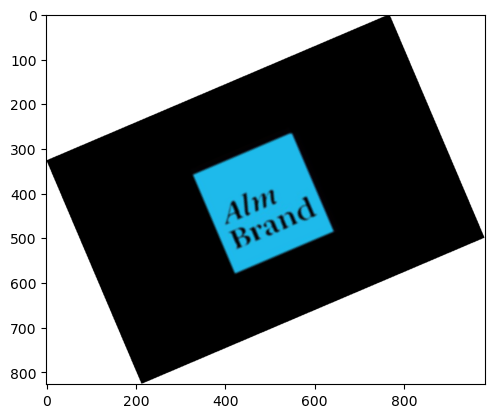

In [63]:
#plot one image
img3 = augmented_2["augmented_images"].iloc[8]
plt.imshow(img3.permute(1, 2, 0))
plt.show()

In [50]:
'''This will make new subfolders with the brand names as folder names -- use one time'''

image_directory = r'C:\Users\EmiliaGachowetz-Gepp\Documents\Image Augmentation\Images'

image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
for image_file in image_files:
    folder_name = os.path.splitext(image_file)[0]
    subfolder_path = os.path.join('Augmented Images', folder_name)
    os.makedirs(subfolder_path, exist_ok=True)

In [64]:
'''This function will save all the augmented images (which are the tensors in the augmented_df) in the above created folders'''

def save_tensors_to_folders(df, image_directory):
    for index, row in df.iterrows():
        filename = row['filename']
        brand = filename.split('.')[0] #Extract brand name from filename
        new_filename = f"{brand}_{index}.jpg" 
        # Check if the brand subfolder exists, if not, create it
        subfolder_path = os.path.join(image_directory, 'Augmented Images', brand)
        os.makedirs(subfolder_path, exist_ok=True)
        
        # Save the image to the corresponding subfolder
        image = row['augmented_images']
        image_path = os.path.join(subfolder_path, new_filename)
        save_image(image, image_path, format='png')

# Example usage
image_directory = r"C:\Users\EmiliaGachowetz-Gepp\Documents\Image Augmentation"
save_tensors_to_folders(augmented_2, image_directory)


In [23]:
alpha_channel = torch.full((1, 116, 539), 255, dtype=torch.uint8)

# Concatenate the RGB image tensor with the alpha channel along the channel dimension
img_tensor_rgba = torch.cat((img2, alpha_channel), dim=0)

# Verify the shape of the RGBA image tensor
print("Shape of RGBA image tensor:", img_tensor_rgba.shape)

Shape of RGBA image tensor: torch.Size([4, 116, 539])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


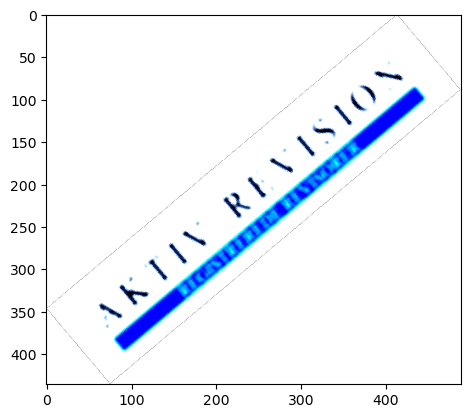

In [34]:
# Rotate the image without empty areas
#img = img.convert('RGBA')
angle = 40  # Specify the rotation angle
rotated_img = torchvision.transforms.functional.rotate(img_tensor_rgba, angle, fill=(0, 0, 0, 0), expand=True)
plt.imshow(rotated_img.permute(1, 2, 0))

PSEUDO CODES AND TRY OUTS

In [ ]:
Data augmentation
Rotation - every 20 deg. -> [0, 360, 10] -> 18
Brightness -> [0.5, 1.6, 0.1] -> 11
Blur -> [0.3, 5.0, 0.5] -> 10
PSEUDOCODE
example filename output: lidl_0_0.5_0.3
for image in folders:
    if image is svg:
        convert_to_jpg(image)
for rotation in range()
    for brightness in range()
        for blur in range()
filename = brand + "_" + rotation + "_" + brightness

In [ ]:
## Save as PIL
def tensor_to_pil(tensor_img):
    # Convert tensor to NumPy array and transpose dimensions
    img_np = tensor_img.permute(1, 2, 0).cpu().numpy()  # Assuming the tensor is on CPU

    # Convert NumPy array to PIL image
    pil_img = Image.fromarray((img_np * 255).astype('uint8'))  # Scale to 0-255 and cast to uint8
    return pil_img

def apply_and_save(img, aug, num_rows=4, num_cols=4, scale=1.5):
    augmented_images = []
    filenames = []
    
    for i in range(num_rows):
        for j in range(num_cols):
            augmented_img = aug(img)
            augmented_images.append(augmented_img)
            filenames.append(f"augmented_image_{i*num_cols+j}.jpg")
    
    df = pd.DataFrame({
        'aug_imgs': augmented_images,
        'filename': filenames
    })
    
    # Convert tensor images to PIL format
    df['aug_imgs'] = df['aug_imgs'].apply(tensor_to_pil)
    
    return df

augmented_df2 = apply_and_save(img, transforms)
augmented_df2

In [46]:
#convert the images to PIL, this has to be done to save them in the folders
#TODO: maybe a more efficient way?
#is there a loss of quality of the images?

def tensor_to_pil(tensor_img):
    #tensor to np
    img_np = tensor_img.permute(1, 2, 0).cpu().numpy()  # Assuming the tensor is on CPU

    #np to PIL
    pil_img = Image.fromarray((img_np * 255).astype('uint8'))  # Scale to 0-255 and cast to uint8
    return pil_img

def save_pil(df):
    imgs=[]
    filenames = []
    for index, row in df.iterrows():
        img = row['augmented_images']
        filename = row['filename']
        brand = filename.split('.')[0]
        new_filename = f"{brand}_{index}.jpg"
        filenames.append(new_filename)
        img_pil=tensor_to_pil(img)
        img_pil=img_pil.convert('RGBA').convert('RGB') #apparently this keeps the transparency of RGBA
        imgs.append(img_pil)
    
    augmented_df = pd.DataFrame({'augmented_images': imgs,
        'filename': filenames
    })

    return augmented_df
      
pil_df=save_pil(augmented_2)
pil_df

,augmented_images,filename
0,<PIL.Image.Image image mode=RGB size=365x282 a...,4AP Geoteknik_0.jpg
1,<PIL.Image.Image image mode=RGB size=291x364 a...,4AP Geoteknik_1.jpg
2,<PIL.Image.Image image mode=RGB size=363x296 a...,4AP Geoteknik_2.jpg
3,<PIL.Image.Image image mode=RGB size=363x294 a...,4AP Geoteknik_3.jpg
4,<PIL.Image.Image image mode=RGB size=401x512 a...,Aktiv Revision_4.jpg
5,<PIL.Image.Image image mode=RGB size=273x550 a...,Aktiv Revision_5.jpg
6,<PIL.Image.Image image mode=RGB size=367x526 a...,Aktiv Revision_6.jpg
7,<PIL.Image.Image image mode=RGB size=549x274 a...,Aktiv Revision_7.jpg


In [47]:
#this function saves the images in the above created folders
def save_images_to_folders(df, image_directory):
    for index, row in df.iterrows():
        filename = row['filename']
        brand = filename.split('_')[0]  # Extract brand name from filename
        
        # Check if the brand subfolder exists, if not, create it
        subfolder_path = os.path.join(image_directory, 'Augmented Images', brand)
        os.makedirs(subfolder_path, exist_ok=True)
        
        # Save the image to the corresponding subfolder
        image = row['augmented_images']
        image_path = os.path.join(subfolder_path, filename)
        image.save(image_path)

image_directory = r"C:\Users\EmiliaGachowetz-Gepp\Documents\Image Augmentation"
save_images_to_folders(pil_df, image_directory)


from PIL import Image

image = Image.open(filename)
image.thumbnail((x, y), Image.ANTIALIAS)
image.save(filename, quality=100)